# Drop Ball Game Simulation - Visualization Analysis

This notebook provides comprehensive visualizations for the Filipino Drop Ball gambling game simulation, comparing **Fair Game** vs **Tweaked Game** models.

## Analysis Overview

1. **Profit/Loss Over Time** - Track cumulative profit trends
2. **House Edge Comparison** - Theoretical vs Actual house edge
3. **Return on Investment (ROI)** - Player's ROI over time
4. **Hits Distribution** - Frequency of 0/1/2/3 hits on chosen card
5. **Single Ball Distribution** - Which cards received exactly 1 ball per round
6. **Double Ball Distribution** - Which cards received exactly 2 balls per round
7. **Triple Ball Distribution** - Which cards received all 3 balls per round

## 1. Import Libraries and Setup

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Import our simulation module
import drop_ball

# Configure visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# Define color scheme for consistency
FAIR_COLOR = '#2E86AB'  # Blue for Fair Game
TWEAKED_COLOR = '#A23B72'  # Red/Magenta for Tweaked Game

print("✓ All libraries imported successfully")
print(f"✓ Using drop_ball module from: {drop_ball.__file__}")

✓ All libraries imported successfully
✓ Using drop_ball module from: c:\Users\Asus\OneDrive - Camarines Sur Polytechnic Colleges\Documents\4thYear\Modeling_and_Simulation\Final_Project\drop_ball.py


## 2. Run Simulation with Detailed Data Collection

In [2]:
# Simulation parameters
CHOSEN_CARD = '10'
NUM_TRIALS = 10000  # Number of rounds to simulate
SEED = 42  # For reproducibility

# Run simulation with detailed data collection
print("="*70)
print("STARTING SIMULATION")
print("="*70)
sim_data = drop_ball.run_simulations_detailed(
    chosen_card=CHOSEN_CARD, 
    num_trials=NUM_TRIALS, 
    seed=SEED
)
print("\n✓ Simulation completed successfully!")
print(f"  Chosen Card: {CHOSEN_CARD}")
print(f"  Rounds: {NUM_TRIALS:,}")
print(f"  Bet per round: ${sim_data['bet']}")
print("="*70)

STARTING SIMULATION
Running 10,000 rounds for each game model with detailed tracking...
(Each round = 3 balls, Total balls = 30,000)

✓ Fair Game: Total Profit = $-28.00, Win Rate = 41.86%
✓ Tweaked Game: Total Profit = $-1508.00, Win Rate = 36.51%

✓ Simulation completed successfully!
  Chosen Card: 10
  Rounds: 10,000
  Bet per round: $1.0

✓ Fair Game: Total Profit = $-28.00, Win Rate = 41.86%
✓ Tweaked Game: Total Profit = $-1508.00, Win Rate = 36.51%

✓ Simulation completed successfully!
  Chosen Card: 10
  Rounds: 10,000
  Bet per round: $1.0


## 3. Visualization #1: Cumulative Profit/Loss Over Time

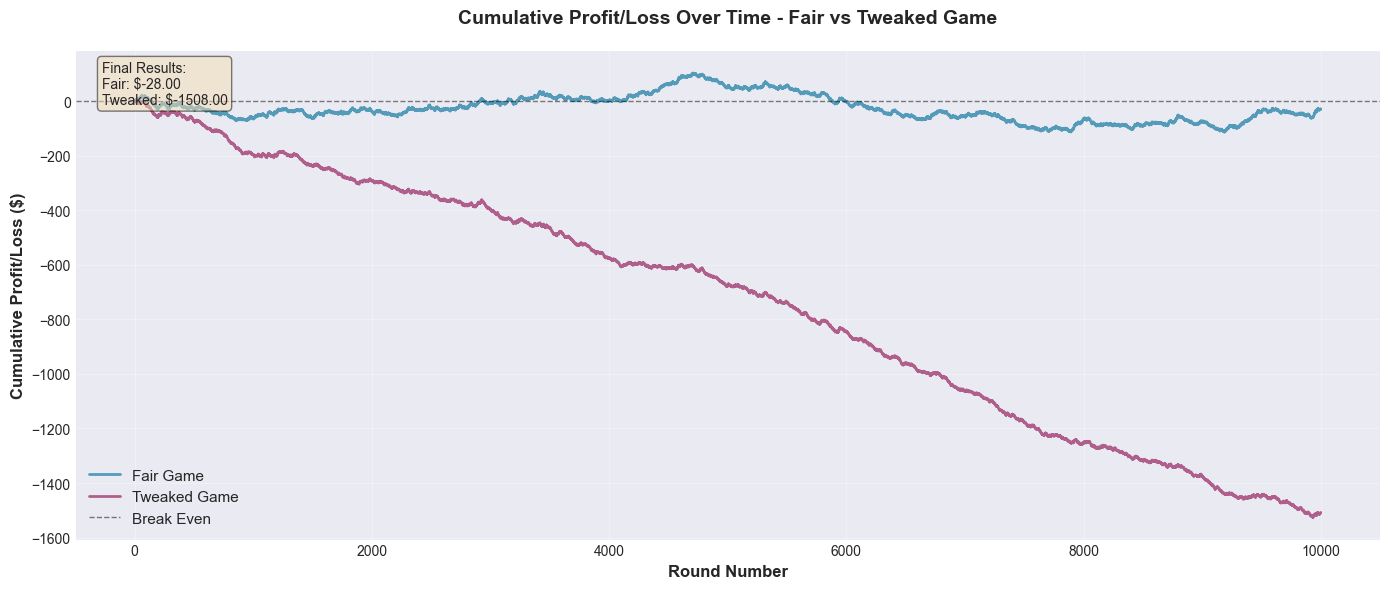

Fair Game - Final Profit: $-28.00
Tweaked Game - Final Profit: $-1508.00
Difference: $1480.00


In [3]:
def plot_profit_over_time(sim_data):
    """Plot cumulative profit/loss over time for both games."""
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Extract cumulative profit data
    fair_cumulative = sim_data['fair_results']['detailed_data']['cumulative_profit']
    tweaked_cumulative = sim_data['tweaked_results']['detailed_data']['cumulative_profit']
    rounds = range(1, len(fair_cumulative) + 1)
    
    # Plot lines
    ax.plot(rounds, fair_cumulative, color=FAIR_COLOR, linewidth=2, label='Fair Game', alpha=0.8)
    ax.plot(rounds, tweaked_cumulative, color=TWEAKED_COLOR, linewidth=2, label='Tweaked Game', alpha=0.8)
    
    # Add zero line for reference
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Break Even')
    
    # Styling
    ax.set_xlabel('Round Number', fontweight='bold', fontsize=12)
    ax.set_ylabel('Cumulative Profit/Loss ($)', fontweight='bold', fontsize=12)
    ax.set_title('Cumulative Profit/Loss Over Time - Fair vs Tweaked Game', 
                 fontweight='bold', fontsize=14, pad=20)
    ax.legend(loc='best', fontsize=11, framealpha=0.9)
    ax.grid(True, alpha=0.3)
    
    # Add final values as text
    final_fair = fair_cumulative[-1]
    final_tweaked = tweaked_cumulative[-1]
    textstr = f'Final Results:\nFair: ${final_fair:.2f}\nTweaked: ${final_tweaked:.2f}'
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print(f"Fair Game - Final Profit: ${final_fair:.2f}")
    print(f"Tweaked Game - Final Profit: ${final_tweaked:.2f}")
    print(f"Difference: ${final_fair - final_tweaked:.2f}")

# Generate the plot
plot_profit_over_time(sim_data)

## 4. Visualization #2: House Edge Comparison (Theoretical vs Actual)

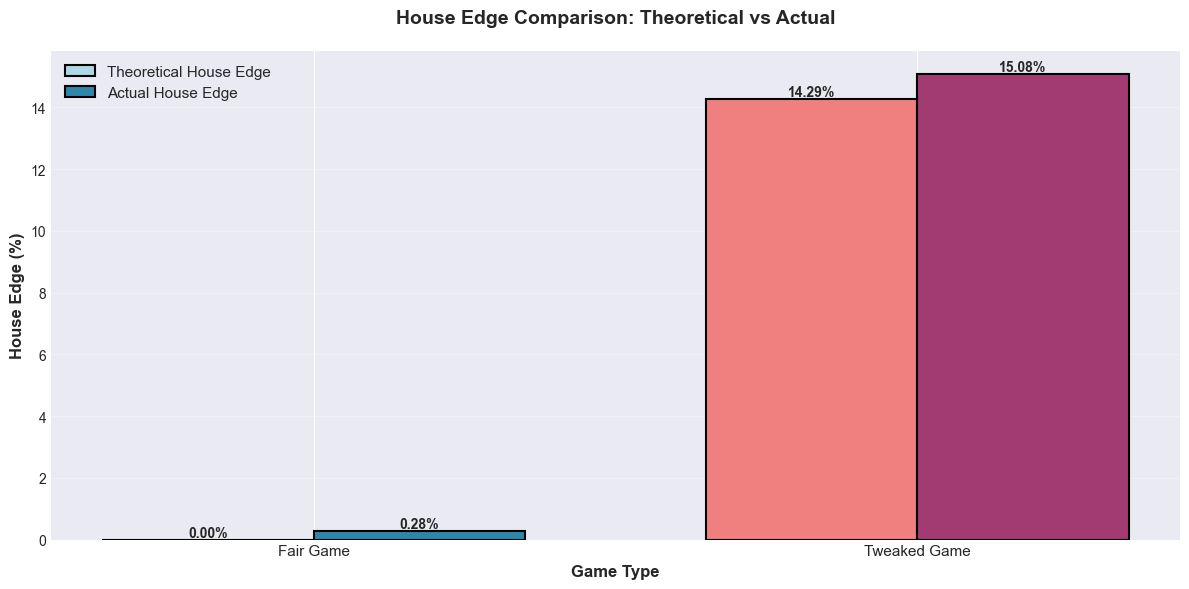

Fair Game - Theoretical: 0.00%, Actual: 0.28%
Tweaked Game - Theoretical: 14.29%, Actual: 15.08%


In [4]:
def plot_house_edge_comparison(sim_data):
    """Compare theoretical vs actual house edge for both games."""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Calculate house edges
    # Theoretical: -EV as percentage
    fair_theoretical = -sim_data['fair_ev']['total_ev'] * 100
    tweaked_theoretical = -sim_data['tweaked_ev']['total_ev'] * 100
    
    # Actual: (Total Loss / Total Wagered) * 100
    total_wagered = sim_data['num_trials'] * sim_data['bet']
    fair_actual = -(sim_data['fair_results']['total_profit'] / total_wagered) * 100
    tweaked_actual = -(sim_data['tweaked_results']['total_profit'] / total_wagered) * 100
    
    # Data for plotting
    categories = ['Fair Game', 'Tweaked Game']
    theoretical = [fair_theoretical, tweaked_theoretical]
    actual = [fair_actual, tweaked_actual]
    
    x = np.arange(len(categories))
    width = 0.35
    
    # Create bars
    bars1 = ax.bar(x - width/2, theoretical, width, label='Theoretical House Edge', 
                   color=['lightblue', 'lightcoral'], edgecolor='black', linewidth=1.5)
    bars2 = ax.bar(x + width/2, actual, width, label='Actual House Edge', 
                   color=[FAIR_COLOR, TWEAKED_COLOR], edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Styling
    ax.set_xlabel('Game Type', fontweight='bold', fontsize=12)
    ax.set_ylabel('House Edge (%)', fontweight='bold', fontsize=12)
    ax.set_title('House Edge Comparison: Theoretical vs Actual', fontweight='bold', fontsize=14, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=11)
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(True, axis='y', alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Fair Game - Theoretical: {fair_theoretical:.2f}%, Actual: {fair_actual:.2f}%")
    print(f"Tweaked Game - Theoretical: {tweaked_theoretical:.2f}%, Actual: {tweaked_actual:.2f}%")

# Generate the plot
plot_house_edge_comparison(sim_data)

## 5. Visualization #3: Return on Investment (ROI) Over Time

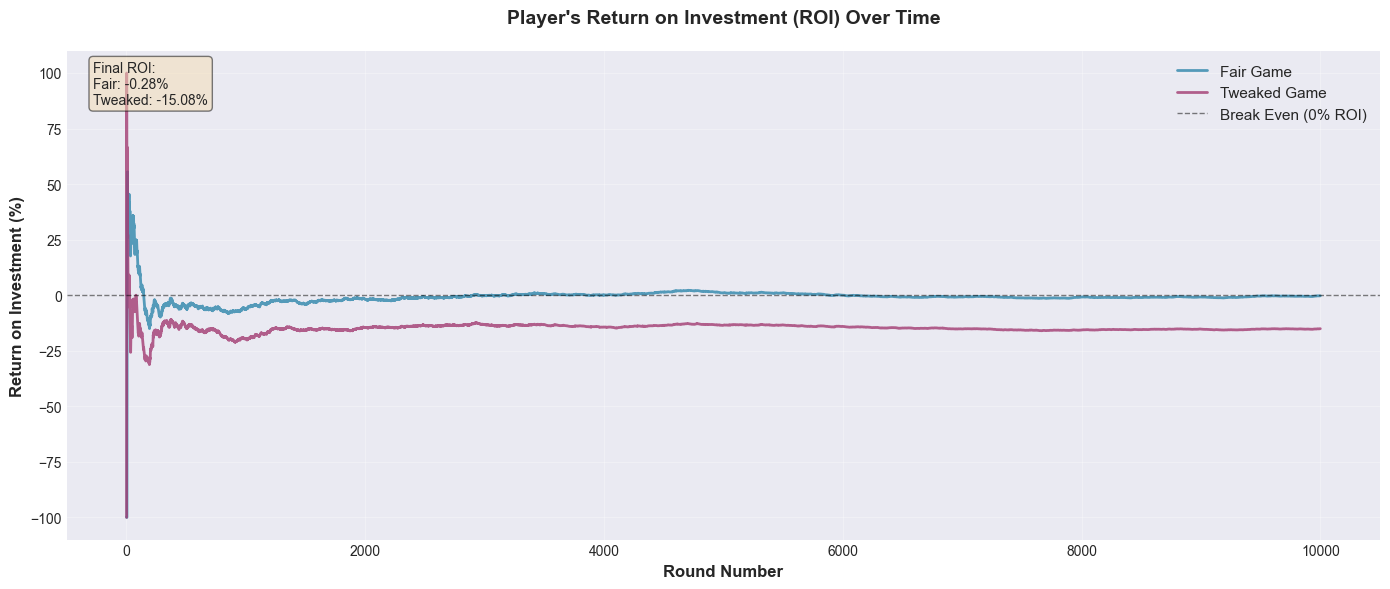

Fair Game - Final ROI: -0.28%
Tweaked Game - Final ROI: -15.08%


In [5]:
def plot_roi_over_time(sim_data):
    """Plot Return on Investment (ROI) over time for both games."""
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Calculate ROI at each round: (cumulative_profit / total_wagered) * 100
    fair_cumulative = np.array(sim_data['fair_results']['detailed_data']['cumulative_profit'])
    tweaked_cumulative = np.array(sim_data['tweaked_results']['detailed_data']['cumulative_profit'])
    
    rounds = np.arange(1, len(fair_cumulative) + 1)
    total_wagered = rounds * sim_data['bet']
    
    fair_roi = (fair_cumulative / total_wagered) * 100
    tweaked_roi = (tweaked_cumulative / total_wagered) * 100
    
    # Plot lines
    ax.plot(rounds, fair_roi, color=FAIR_COLOR, linewidth=2, label='Fair Game', alpha=0.8)
    ax.plot(rounds, tweaked_roi, color=TWEAKED_COLOR, linewidth=2, label='Tweaked Game', alpha=0.8)
    
    # Add zero line for reference
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Break Even (0% ROI)')
    
    # Styling
    ax.set_xlabel('Round Number', fontweight='bold', fontsize=12)
    ax.set_ylabel('Return on Investment (%)', fontweight='bold', fontsize=12)
    ax.set_title('Player\'s Return on Investment (ROI) Over Time', fontweight='bold', fontsize=14, pad=20)
    ax.legend(loc='best', fontsize=11, framealpha=0.9)
    ax.grid(True, alpha=0.3)
    
    # Add final values as text
    final_fair_roi = fair_roi[-1]
    final_tweaked_roi = tweaked_roi[-1]
    textstr = f'Final ROI:\nFair: {final_fair_roi:.2f}%\nTweaked: {final_tweaked_roi:.2f}%'
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print(f"Fair Game - Final ROI: {final_fair_roi:.2f}%")
    print(f"Tweaked Game - Final ROI: {final_tweaked_roi:.2f}%")

# Generate the plot
plot_roi_over_time(sim_data)

## 6. Visualization #4: Distribution of Hits on Player's Chosen Card

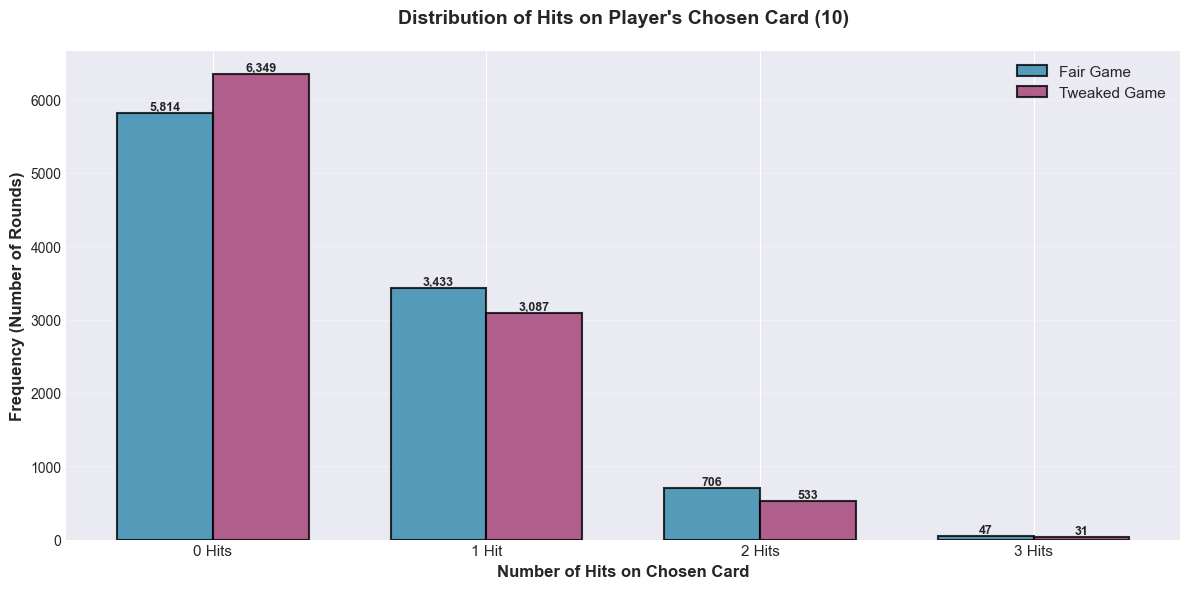

Fair Game Hits Distribution:
  0 hits: 5,814 rounds (58.14%)
  1 hits: 3,433 rounds (34.33%)
  2 hits: 706 rounds (7.06%)
  3 hits: 47 rounds (0.47%)

Tweaked Game Hits Distribution:
  0 hits: 6,349 rounds (63.49%)
  1 hits: 3,087 rounds (30.87%)
  2 hits: 533 rounds (5.33%)
  3 hits: 31 rounds (0.31%)


In [6]:
def plot_hits_distribution(sim_data):
    """Plot distribution of 0/1/2/3 hits on player's chosen card."""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Extract hits distribution data
    fair_dist = sim_data['fair_results']['hits_distribution']
    tweaked_dist = sim_data['tweaked_results']['hits_distribution']
    
    # Prepare data
    hits_categories = ['0 Hits', '1 Hit', '2 Hits', '3 Hits']
    fair_counts = [fair_dist[i] for i in range(4)]
    tweaked_counts = [tweaked_dist[i] for i in range(4)]
    
    x = np.arange(len(hits_categories))
    width = 0.35
    
    # Create bars
    bars1 = ax.bar(x - width/2, fair_counts, width, label='Fair Game', 
                   color=FAIR_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    bars2 = ax.bar(x + width/2, tweaked_counts, width, label='Tweaked Game', 
                   color=TWEAKED_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Styling
    ax.set_xlabel('Number of Hits on Chosen Card', fontweight='bold', fontsize=12)
    ax.set_ylabel('Frequency (Number of Rounds)', fontweight='bold', fontsize=12)
    ax.set_title(f'Distribution of Hits on Player\'s Chosen Card ({CHOSEN_CARD})', 
                 fontweight='bold', fontsize=14, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(hits_categories, fontsize=11)
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(True, axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"Fair Game Hits Distribution:")
    for i in range(4):
        pct = (fair_counts[i] / sum(fair_counts)) * 100
        print(f"  {i} hits: {fair_counts[i]:,} rounds ({pct:.2f}%)")
    
    print(f"\nTweaked Game Hits Distribution:")
    for i in range(4):
        pct = (tweaked_counts[i] / sum(tweaked_counts)) * 100
        print(f"  {i} hits: {tweaked_counts[i]:,} rounds ({pct:.2f}%)")

# Generate the plot
plot_hits_distribution(sim_data)

## 7. Visualization #5: Single Ball Drop Distribution Across All Cards

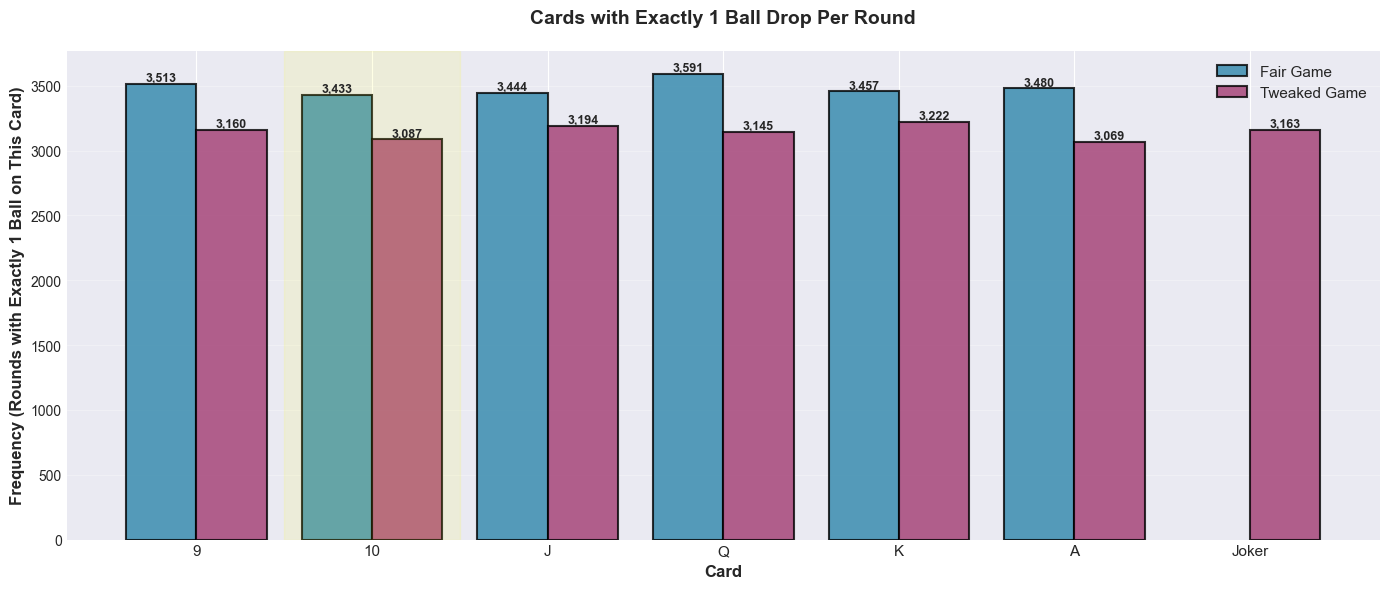

In [7]:
def plot_single_ball_distribution(sim_data):
    """Plot which cards received exactly 1 ball in a round."""
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Extract single hit data
    fair_single = sim_data['fair_results']['detailed_data']['single_hit_cards']
    tweaked_single = sim_data['tweaked_results']['detailed_data']['single_hit_cards']
    
    # Get all cards for each game
    fair_cards = list(fair_single.keys())
    tweaked_cards = list(tweaked_single.keys())
    
    # For Fair Game (6 cards)
    fair_counts = [fair_single[card] for card in fair_cards]
    
    # For Tweaked Game (7 cards including Joker)
    tweaked_counts = [tweaked_single[card] for card in tweaked_cards]
    
    # Plot Fair Game
    x_fair = np.arange(len(fair_cards))
    bars1 = ax.bar(x_fair - 0.2, fair_counts, 0.4, label='Fair Game', 
                   color=FAIR_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add Tweaked Game (may have more cards)
    x_tweaked = np.arange(len(tweaked_cards))
    bars2 = ax.bar(x_tweaked + 0.2, tweaked_counts, 0.4, label='Tweaked Game', 
                   color=TWEAKED_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Styling - use tweaked cards (includes all cards)
    ax.set_xlabel('Card', fontweight='bold', fontsize=12)
    ax.set_ylabel('Frequency (Rounds with Exactly 1 Ball on This Card)', fontweight='bold', fontsize=12)
    ax.set_title('Cards with Exactly 1 Ball Drop Per Round', fontweight='bold', fontsize=14, pad=20)
    ax.set_xticks(x_tweaked)
    ax.set_xticklabels(tweaked_cards, fontsize=11)
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(True, axis='y', alpha=0.3)
    
    # Highlight chosen card
    chosen_idx = tweaked_cards.index(CHOSEN_CARD) if CHOSEN_CARD in tweaked_cards else -1
    if chosen_idx >= 0:
        ax.axvspan(chosen_idx - 0.5, chosen_idx + 0.5, alpha=0.1, color='yellow', label=f'Chosen Card ({CHOSEN_CARD})')
    
    plt.tight_layout()
    plt.show()

# Generate the plot
plot_single_ball_distribution(sim_data)

## 8. Visualization #6: Double Ball Drop Distribution Across All Cards

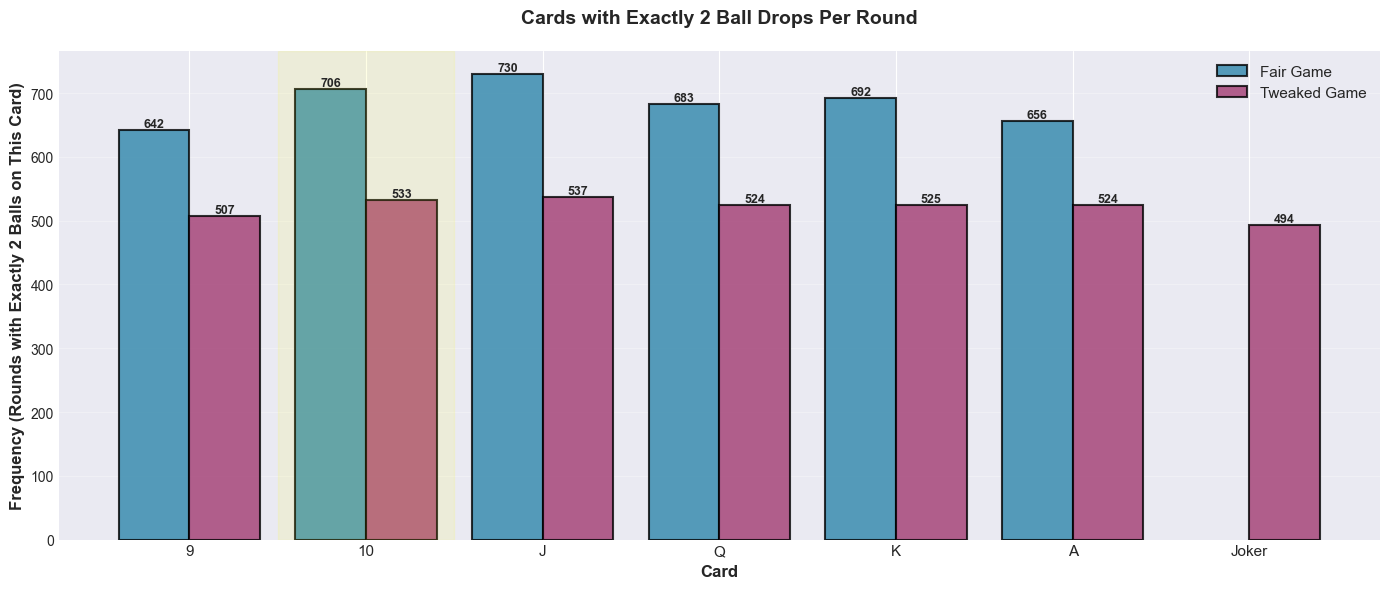

In [8]:
def plot_double_ball_distribution(sim_data):
    """Plot which cards received exactly 2 balls in a round."""
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Extract double hit data
    fair_double = sim_data['fair_results']['detailed_data']['double_hit_cards']
    tweaked_double = sim_data['tweaked_results']['detailed_data']['double_hit_cards']
    
    # Get all cards for each game
    fair_cards = list(fair_double.keys())
    tweaked_cards = list(tweaked_double.keys())
    
    # For Fair Game (6 cards)
    fair_counts = [fair_double[card] for card in fair_cards]
    
    # For Tweaked Game (7 cards including Joker)
    tweaked_counts = [tweaked_double[card] for card in tweaked_cards]
    
    # Plot Fair Game
    x_fair = np.arange(len(fair_cards))
    bars1 = ax.bar(x_fair - 0.2, fair_counts, 0.4, label='Fair Game', 
                   color=FAIR_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add Tweaked Game
    x_tweaked = np.arange(len(tweaked_cards))
    bars2 = ax.bar(x_tweaked + 0.2, tweaked_counts, 0.4, label='Tweaked Game', 
                   color=TWEAKED_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Styling
    ax.set_xlabel('Card', fontweight='bold', fontsize=12)
    ax.set_ylabel('Frequency (Rounds with Exactly 2 Balls on This Card)', fontweight='bold', fontsize=12)
    ax.set_title('Cards with Exactly 2 Ball Drops Per Round', fontweight='bold', fontsize=14, pad=20)
    ax.set_xticks(x_tweaked)
    ax.set_xticklabels(tweaked_cards, fontsize=11)
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(True, axis='y', alpha=0.3)
    
    # Highlight chosen card
    chosen_idx = tweaked_cards.index(CHOSEN_CARD) if CHOSEN_CARD in tweaked_cards else -1
    if chosen_idx >= 0:
        ax.axvspan(chosen_idx - 0.5, chosen_idx + 0.5, alpha=0.1, color='yellow', label=f'Chosen Card ({CHOSEN_CARD})')
    
    plt.tight_layout()
    plt.show()

# Generate the plot
plot_double_ball_distribution(sim_data)

## 9. Visualization #7: Triple Ball Drop Distribution Across All Cards

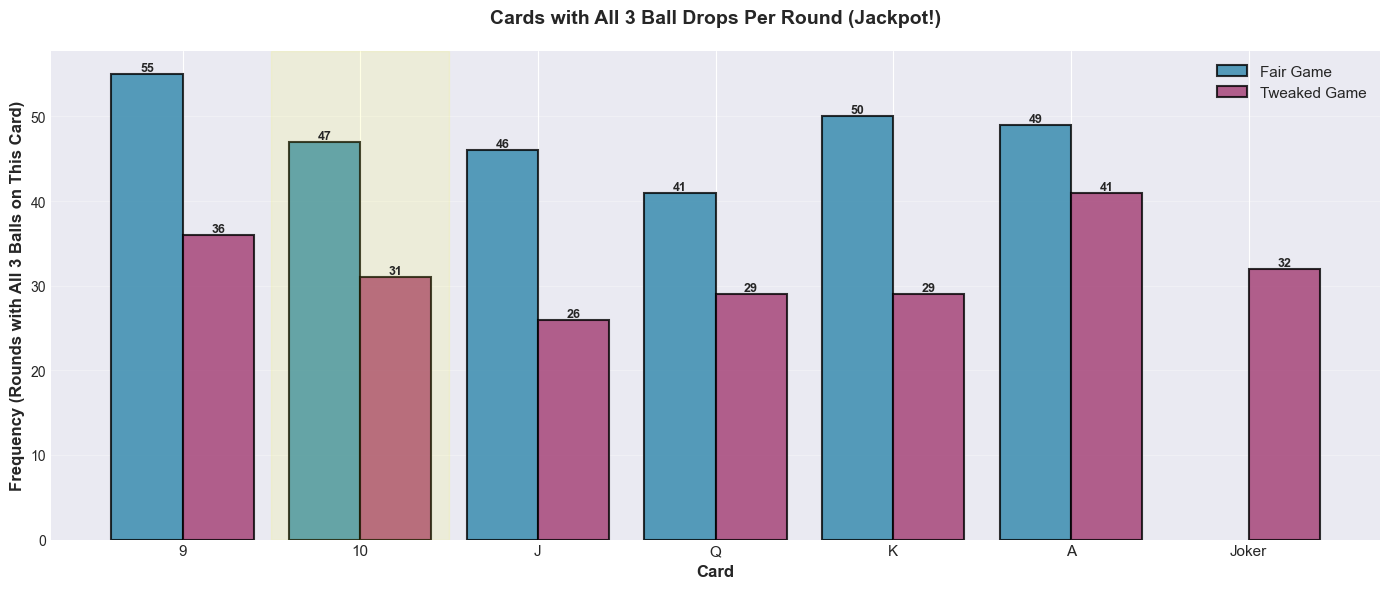

Total rounds with 3 balls on same card:
  Fair Game: 288 rounds
  Tweaked Game: 224 rounds


In [9]:
def plot_triple_ball_distribution(sim_data):
    """Plot which cards received all 3 balls in a round."""
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Extract triple hit data
    fair_triple = sim_data['fair_results']['detailed_data']['triple_hit_cards']
    tweaked_triple = sim_data['tweaked_results']['detailed_data']['triple_hit_cards']
    
    # Get all cards for each game
    fair_cards = list(fair_triple.keys())
    tweaked_cards = list(tweaked_triple.keys())
    
    # For Fair Game (6 cards)
    fair_counts = [fair_triple[card] for card in fair_cards]
    
    # For Tweaked Game (7 cards including Joker)
    tweaked_counts = [tweaked_triple[card] for card in tweaked_cards]
    
    # Plot Fair Game
    x_fair = np.arange(len(fair_cards))
    bars1 = ax.bar(x_fair - 0.2, fair_counts, 0.4, label='Fair Game', 
                   color=FAIR_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add Tweaked Game
    x_tweaked = np.arange(len(tweaked_cards))
    bars2 = ax.bar(x_tweaked + 0.2, tweaked_counts, 0.4, label='Tweaked Game', 
                   color=TWEAKED_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Styling
    ax.set_xlabel('Card', fontweight='bold', fontsize=12)
    ax.set_ylabel('Frequency (Rounds with All 3 Balls on This Card)', fontweight='bold', fontsize=12)
    ax.set_title('Cards with All 3 Ball Drops Per Round (Jackpot!)', fontweight='bold', fontsize=14, pad=20)
    ax.set_xticks(x_tweaked)
    ax.set_xticklabels(tweaked_cards, fontsize=11)
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(True, axis='y', alpha=0.3)
    
    # Highlight chosen card
    chosen_idx = tweaked_cards.index(CHOSEN_CARD) if CHOSEN_CARD in tweaked_cards else -1
    if chosen_idx >= 0:
        ax.axvspan(chosen_idx - 0.5, chosen_idx + 0.5, alpha=0.1, color='yellow', label=f'Chosen Card ({CHOSEN_CARD})')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    total_fair_triple = sum(fair_counts)
    total_tweaked_triple = sum(tweaked_counts)
    print(f"Total rounds with 3 balls on same card:")
    print(f"  Fair Game: {total_fair_triple:,} rounds")
    print(f"  Tweaked Game: {total_tweaked_triple:,} rounds")

# Generate the plot
plot_triple_ball_distribution(sim_data)

## 10. Master Dashboard - All Visualizations Combined

✓ Dashboard saved as 'drop_ball_dashboard.png'


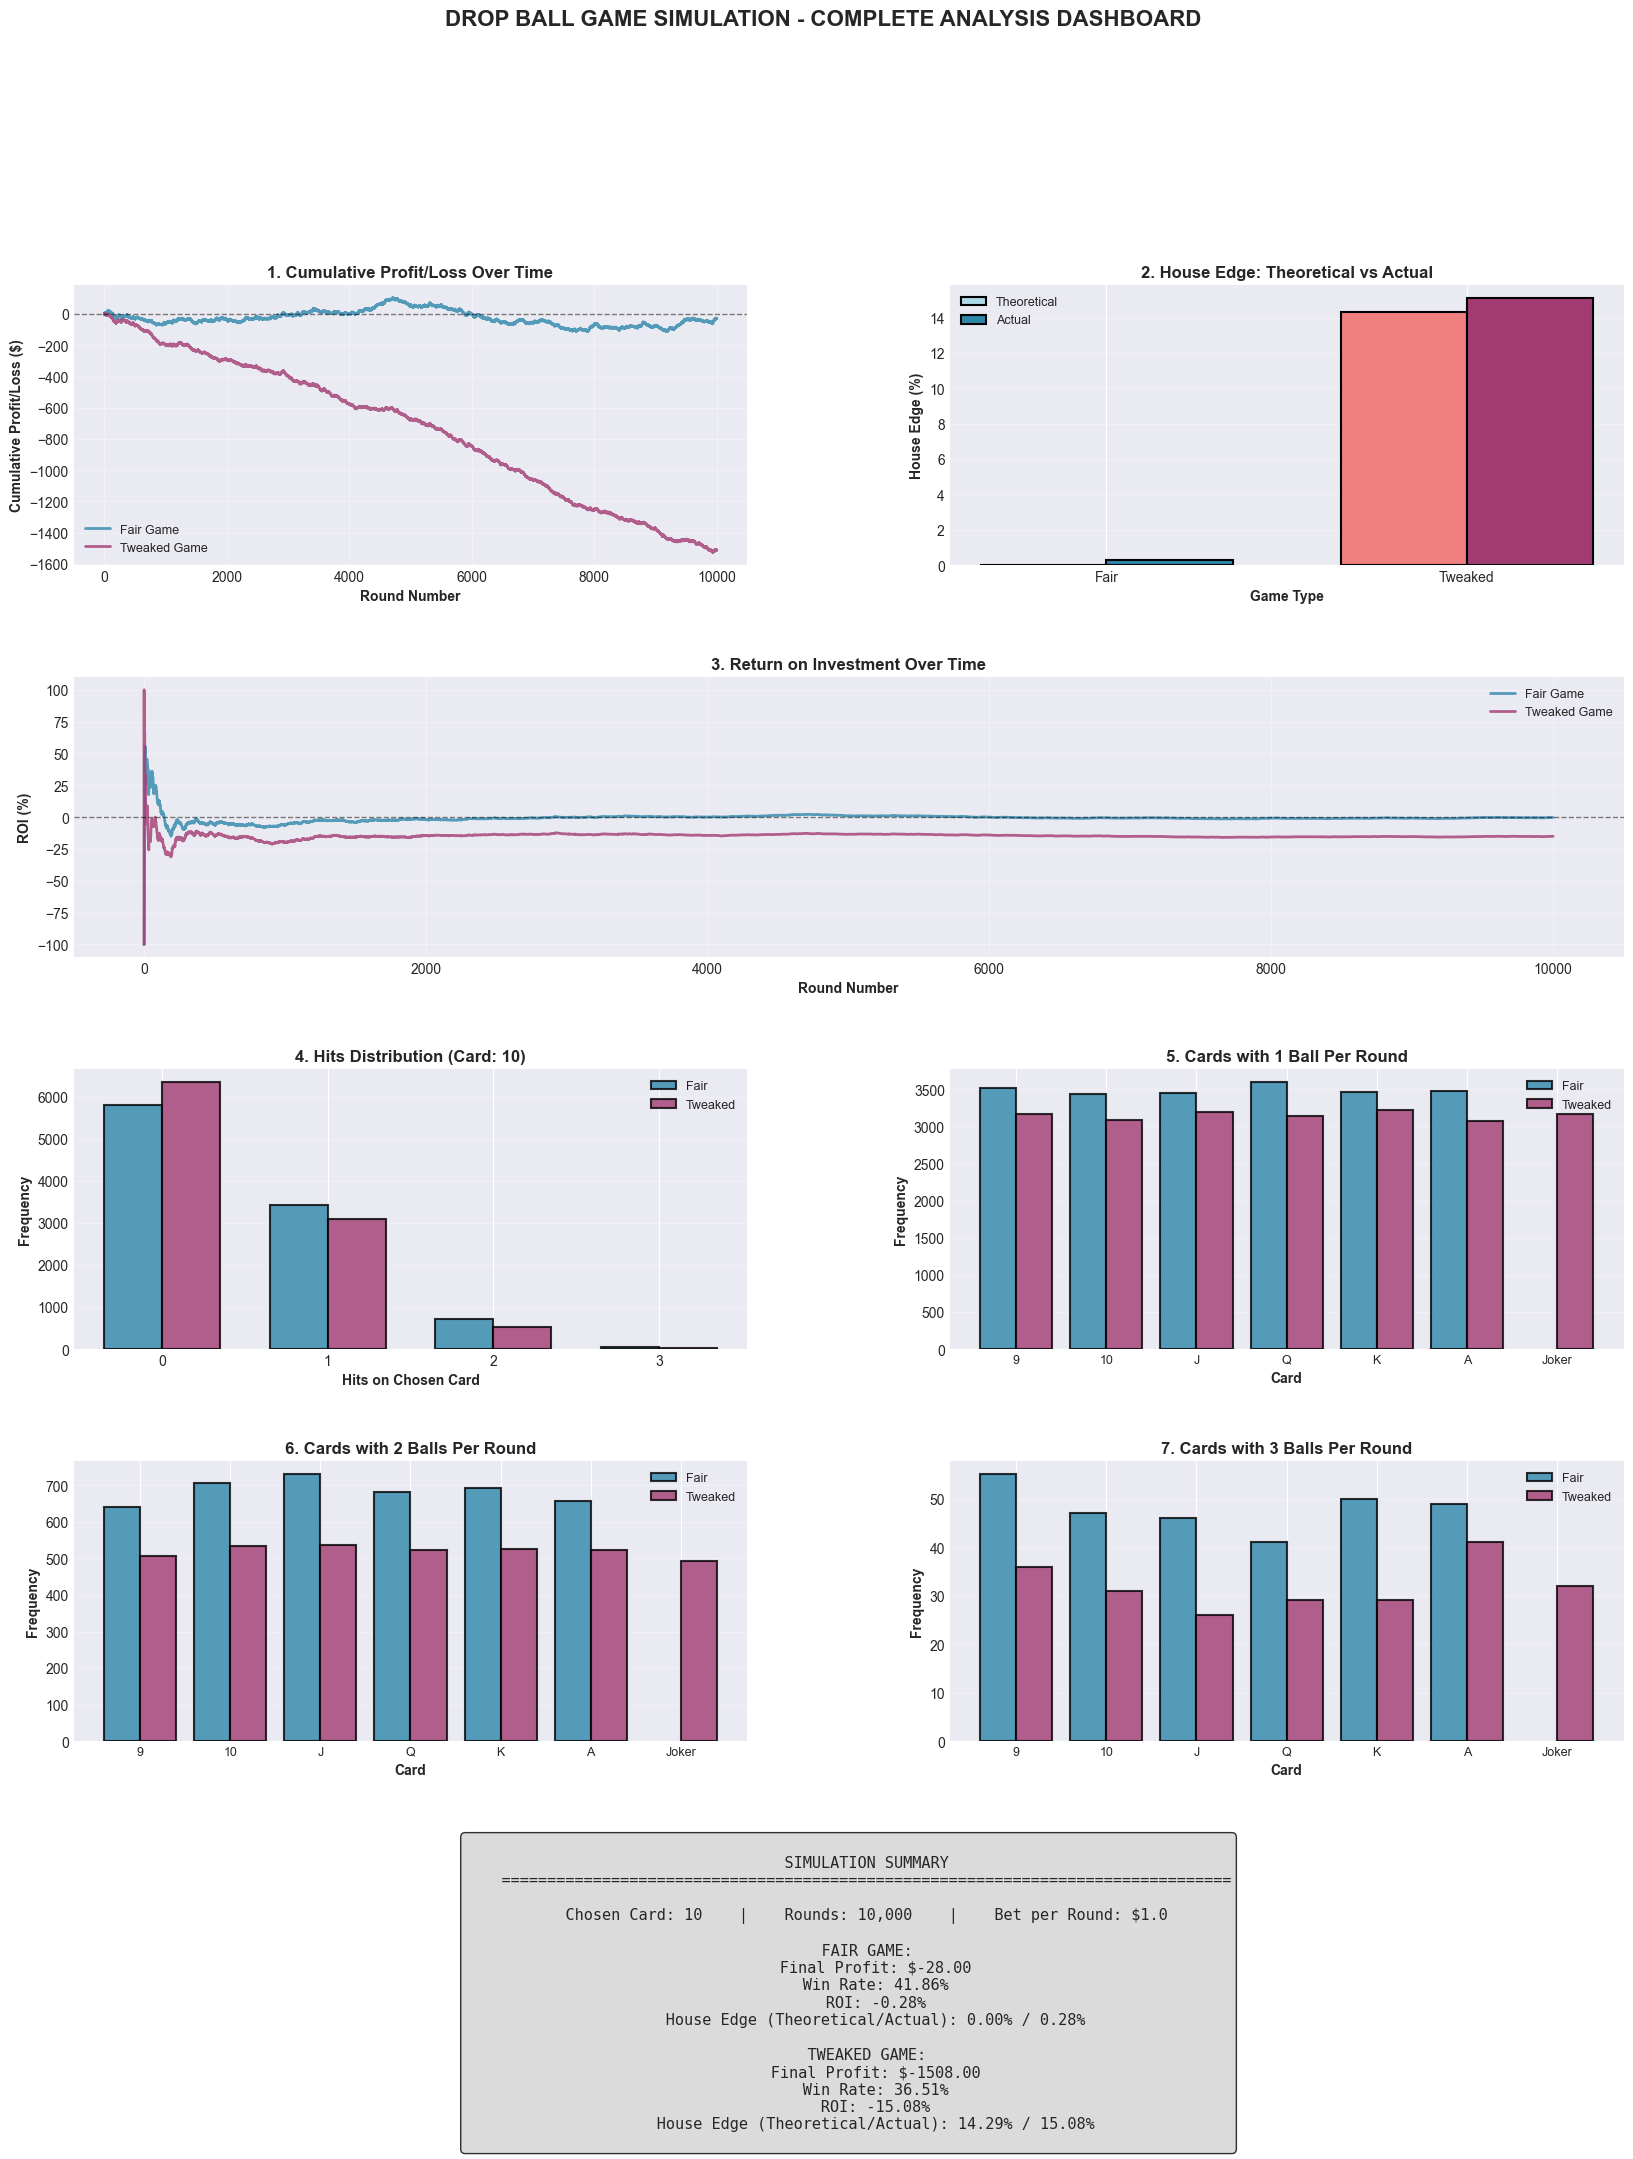

In [10]:
def generate_master_dashboard(sim_data):
    """Generate a comprehensive dashboard with all 7 visualizations."""
    
    # Create figure with GridSpec for flexible layout
    fig = plt.figure(figsize=(20, 24))
    gs = GridSpec(5, 2, figure=fig, hspace=0.4, wspace=0.3)
    
    # Extract data once
    fair_cumulative = sim_data['fair_results']['detailed_data']['cumulative_profit']
    tweaked_cumulative = sim_data['tweaked_results']['detailed_data']['cumulative_profit']
    rounds = range(1, len(fair_cumulative) + 1)
    
    # 1. Cumulative Profit/Loss (Top Left)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(rounds, fair_cumulative, color=FAIR_COLOR, linewidth=2, label='Fair Game', alpha=0.8)
    ax1.plot(rounds, tweaked_cumulative, color=TWEAKED_COLOR, linewidth=2, label='Tweaked Game', alpha=0.8)
    ax1.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax1.set_xlabel('Round Number', fontweight='bold')
    ax1.set_ylabel('Cumulative Profit/Loss ($)', fontweight='bold')
    ax1.set_title('1. Cumulative Profit/Loss Over Time', fontweight='bold', fontsize=12)
    ax1.legend(loc='best', fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # 2. House Edge Comparison (Top Right)
    ax2 = fig.add_subplot(gs[0, 1])
    fair_theoretical = -sim_data['fair_ev']['total_ev'] * 100
    tweaked_theoretical = -sim_data['tweaked_ev']['total_ev'] * 100
    total_wagered = sim_data['num_trials'] * sim_data['bet']
    fair_actual = -(sim_data['fair_results']['total_profit'] / total_wagered) * 100
    tweaked_actual = -(sim_data['tweaked_results']['total_profit'] / total_wagered) * 100
    
    x = np.arange(2)
    width = 0.35
    ax2.bar(x - width/2, [fair_theoretical, tweaked_theoretical], width, 
            label='Theoretical', color=['lightblue', 'lightcoral'], edgecolor='black', linewidth=1.5)
    ax2.bar(x + width/2, [fair_actual, tweaked_actual], width, 
            label='Actual', color=[FAIR_COLOR, TWEAKED_COLOR], edgecolor='black', linewidth=1.5)
    ax2.set_xlabel('Game Type', fontweight='bold')
    ax2.set_ylabel('House Edge (%)', fontweight='bold')
    ax2.set_title('2. House Edge: Theoretical vs Actual', fontweight='bold', fontsize=12)
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Fair', 'Tweaked'])
    ax2.legend(fontsize=9)
    ax2.grid(True, axis='y', alpha=0.3)
    
    # 3. ROI Over Time (Row 2, Span Both Columns)
    ax3 = fig.add_subplot(gs[1, :])
    fair_cumulative_arr = np.array(fair_cumulative)
    tweaked_cumulative_arr = np.array(tweaked_cumulative)
    rounds_arr = np.arange(1, len(fair_cumulative) + 1)
    total_wagered_arr = rounds_arr * sim_data['bet']
    fair_roi = (fair_cumulative_arr / total_wagered_arr) * 100
    tweaked_roi = (tweaked_cumulative_arr / total_wagered_arr) * 100
    
    ax3.plot(rounds, fair_roi, color=FAIR_COLOR, linewidth=2, label='Fair Game', alpha=0.8)
    ax3.plot(rounds, tweaked_roi, color=TWEAKED_COLOR, linewidth=2, label='Tweaked Game', alpha=0.8)
    ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax3.set_xlabel('Round Number', fontweight='bold')
    ax3.set_ylabel('ROI (%)', fontweight='bold')
    ax3.set_title('3. Return on Investment Over Time', fontweight='bold', fontsize=12)
    ax3.legend(loc='best', fontsize=9)
    ax3.grid(True, alpha=0.3)
    
    # 4. Hits Distribution (Row 3, Left)
    ax4 = fig.add_subplot(gs[2, 0])
    fair_dist = sim_data['fair_results']['hits_distribution']
    tweaked_dist = sim_data['tweaked_results']['hits_distribution']
    hits_categories = ['0', '1', '2', '3']
    fair_counts = [fair_dist[i] for i in range(4)]
    tweaked_counts = [tweaked_dist[i] for i in range(4)]
    
    x = np.arange(4)
    width = 0.35
    ax4.bar(x - width/2, fair_counts, width, label='Fair', color=FAIR_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax4.bar(x + width/2, tweaked_counts, width, label='Tweaked', color=TWEAKED_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax4.set_xlabel('Hits on Chosen Card', fontweight='bold')
    ax4.set_ylabel('Frequency', fontweight='bold')
    ax4.set_title(f'4. Hits Distribution (Card: {CHOSEN_CARD})', fontweight='bold', fontsize=12)
    ax4.set_xticks(x)
    ax4.set_xticklabels(hits_categories)
    ax4.legend(fontsize=9)
    ax4.grid(True, axis='y', alpha=0.3)
    
    # 5. Single Ball Distribution (Row 3, Right)
    ax5 = fig.add_subplot(gs[2, 1])
    fair_single = sim_data['fair_results']['detailed_data']['single_hit_cards']
    tweaked_single = sim_data['tweaked_results']['detailed_data']['single_hit_cards']
    tweaked_cards = list(tweaked_single.keys())
    fair_cards = list(fair_single.keys())
    
    x_fair = np.arange(len(fair_cards))
    x_tweaked = np.arange(len(tweaked_cards))
    ax5.bar(x_fair - 0.2, [fair_single[c] for c in fair_cards], 0.4, label='Fair', 
            color=FAIR_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax5.bar(x_tweaked + 0.2, [tweaked_single[c] for c in tweaked_cards], 0.4, label='Tweaked', 
            color=TWEAKED_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax5.set_xlabel('Card', fontweight='bold')
    ax5.set_ylabel('Frequency', fontweight='bold')
    ax5.set_title('5. Cards with 1 Ball Per Round', fontweight='bold', fontsize=12)
    ax5.set_xticks(x_tweaked)
    ax5.set_xticklabels(tweaked_cards, fontsize=9)
    ax5.legend(fontsize=9)
    ax5.grid(True, axis='y', alpha=0.3)
    
    # 6. Double Ball Distribution (Row 4, Left)
    ax6 = fig.add_subplot(gs[3, 0])
    fair_double = sim_data['fair_results']['detailed_data']['double_hit_cards']
    tweaked_double = sim_data['tweaked_results']['detailed_data']['double_hit_cards']
    
    ax6.bar(x_fair - 0.2, [fair_double[c] for c in fair_cards], 0.4, label='Fair', 
            color=FAIR_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax6.bar(x_tweaked + 0.2, [tweaked_double[c] for c in tweaked_cards], 0.4, label='Tweaked', 
            color=TWEAKED_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax6.set_xlabel('Card', fontweight='bold')
    ax6.set_ylabel('Frequency', fontweight='bold')
    ax6.set_title('6. Cards with 2 Balls Per Round', fontweight='bold', fontsize=12)
    ax6.set_xticks(x_tweaked)
    ax6.set_xticklabels(tweaked_cards, fontsize=9)
    ax6.legend(fontsize=9)
    ax6.grid(True, axis='y', alpha=0.3)
    
    # 7. Triple Ball Distribution (Row 4, Right)
    ax7 = fig.add_subplot(gs[3, 1])
    fair_triple = sim_data['fair_results']['detailed_data']['triple_hit_cards']
    tweaked_triple = sim_data['tweaked_results']['detailed_data']['triple_hit_cards']
    
    ax7.bar(x_fair - 0.2, [fair_triple[c] for c in fair_cards], 0.4, label='Fair', 
            color=FAIR_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax7.bar(x_tweaked + 0.2, [tweaked_triple[c] for c in tweaked_cards], 0.4, label='Tweaked', 
            color=TWEAKED_COLOR, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax7.set_xlabel('Card', fontweight='bold')
    ax7.set_ylabel('Frequency', fontweight='bold')
    ax7.set_title('7. Cards with 3 Balls Per Round', fontweight='bold', fontsize=12)
    ax7.set_xticks(x_tweaked)
    ax7.set_xticklabels(tweaked_cards, fontsize=9)
    ax7.legend(fontsize=9)
    ax7.grid(True, axis='y', alpha=0.3)
    
    # Summary Statistics (Bottom Row)
    ax8 = fig.add_subplot(gs[4, :])
    ax8.axis('off')
    
    summary_text = f"""
    SIMULATION SUMMARY
    {'='*80}
    
    Chosen Card: {CHOSEN_CARD}    |    Rounds: {sim_data['num_trials']:,}    |    Bet per Round: ${sim_data['bet']}
    
    FAIR GAME:
      Final Profit: ${sim_data['fair_results']['total_profit']:.2f}
      Win Rate: {sim_data['fair_results']['win_rate']*100:.2f}%
      ROI: {fair_roi[-1]:.2f}%
      House Edge (Theoretical/Actual): {fair_theoretical:.2f}% / {fair_actual:.2f}%
    
    TWEAKED GAME:
      Final Profit: ${sim_data['tweaked_results']['total_profit']:.2f}
      Win Rate: {sim_data['tweaked_results']['win_rate']*100:.2f}%
      ROI: {tweaked_roi[-1]:.2f}%
      House Edge (Theoretical/Actual): {tweaked_theoretical:.2f}% / {tweaked_actual:.2f}%
    """
    
    ax8.text(0.5, 0.5, summary_text, transform=ax8.transAxes, fontsize=11,
             verticalalignment='center', horizontalalignment='center', family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.suptitle('DROP BALL GAME SIMULATION - COMPLETE ANALYSIS DASHBOARD', 
                 fontweight='bold', fontsize=16, y=0.995)
    
    # Save figure
    plt.savefig('drop_ball_dashboard.png', dpi=300, bbox_inches='tight')
    print("✓ Dashboard saved as 'drop_ball_dashboard.png'")
    
    plt.show()

# Generate the master dashboard
generate_master_dashboard(sim_data)

## Summary & Conclusions

This notebook provides comprehensive visualization analysis of the Drop Ball gambling game simulation:

### Key Findings:

1. **Profit Trend Analysis**: Tracks how player's profit/loss evolves over thousands of rounds
2. **House Edge Validation**: Compares theoretical mathematical house edge with actual simulation results
3. **ROI Tracking**: Shows player's return on investment percentage throughout gameplay
4. **Hit Distribution**: Analyzes frequency of 0/1/2/3 balls landing on player's chosen card
5. **Card Landing Patterns**: Visualizes which cards are "hot" or "cold" for single/double/triple drops

### Game Comparison:

- **Fair Game**: Equal probability (1/6) per card, designed for near-zero expected value
- **Tweaked Game**: Includes Joker card (1/7 probability), introducing house edge

All visualizations are generated from actual simulation data with configurable parameters for reproducibility and statistical analysis.